# Assignment 1

**Assignment 1: Optimization**

**Goal**: ​Get familiar with gradient-based and derivative-free optimization by implementing these methods and applying them to a given function.

In this assignment we are going to learn about **gradient-based** (GD) optimization methods and **derivative-free optimization** (DFO) methods. The goal is to implement these methods (one from each group) and analyze their behavior. Importantly, we aim at noticing differences between these two groups of methods.

Here, we are interested in ​minimizing​ the following function:

$$
f(\mathbf{x})=x_{1}^{2}+2 x_{2}^{2}-0.3 \cos \left(3 \pi x_{1}\right)-0.4 \cos \left(4 \pi x_{2}\right)+0.7
$$

in the domain $\mathbf{x} = (x_1, x_2) \in [-100, 100]^{2}$ (i.e., $x_1 \in [-100, 100]$, $x_2 \in [-100, 100]$).

In this assignemnt, you are asked to implement:
1. The gradient-descent algorithm.
2. A chosen derivative-free algorithm. *You are free to choose a method.*

After implementing both methods, please run experiments and compare both methods. Please find a more detailed description below.

## 1. Understanding the objective

Please run the code below and visualize the objective function. Please try to understand the objective function, what is the optimum (you can do it by inspecting the plot).

If any code line is unclear to you, please read on that in numpy or matplotlib docs.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# PLEASE DO NOT REMOVE!
# The objective function.
def f(x):
    return x[:,0]**2 + 2*x[:,1]**2 -0.3*np.cos(3.*np.pi*x[:,0])-0.4*np.cos(4.*np.pi*x[:,1])+0.7

In [4]:
# PLEASE DO NOT REMOVE!
# Calculating the objective for visualization.
def calculate_f(x1, x2):
  f_x = []
  for i in range(len(x1)):
    for j in range(len(x2)):
      f_x.append(f(np.asarray([[x1[i], x2[j]]])))
    
  return np.asarray(f_x).reshape(len(x1), len(x2))

In [5]:
# PLEASE DO NOT REMOVE!
# Define coordinates
x1 = np.linspace(-100., 100., 400)
x2 = np.linspace(-100., 100., 400)

# Calculate the objective
f_x = calculate_f(x1, x2).reshape(len(x1), len(x2))

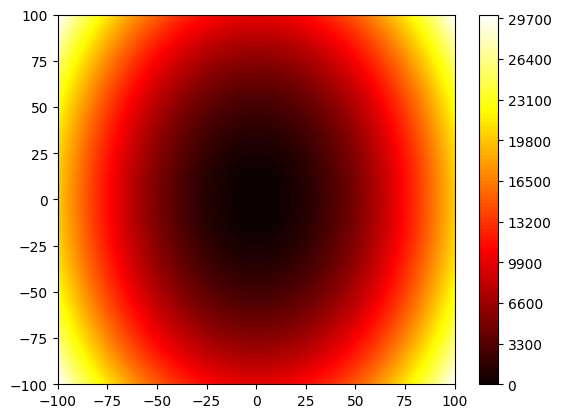

In [6]:
# PLEASE DO NOT REMOVE!
# Plot the objective
plt.contourf(x1, x2, f_x, 100, cmap='hot')
plt.colorbar()

## 2. The gradient-descent algorithm

First, you are asked to implement the gradient descent (GD) algorithm. Please take a look at the class below and fill in the missing parts.

NOTE: Please pay attention to the inputs and outputs of each function.

NOTE: To implement the GD algorithm, we need a gradient with respect to $\mathbf{x}$ of the given function. Please calculate it on a paper and provide the solution below. Then, implement it in an appropriate function that will be further passed to the GD class.

*Question 1 (0-1pt):* What is the gradient of the function $f(\mathbf{x})$?

*Answer:*
\begin{align*}
\nabla_{\mathbf{x}_1} f(\mathbf{x}) &= 2  x_1 + 0.9 \pi \sin(3 \pi x_1) \\
\nabla_{\mathbf{x}_2} f(\mathbf{x}) &= 4  x_2 + 1.6 \pi \sin(4 \pi x_2) \\
\end{align*}

In [7]:
#=========
# GRADING:
# 0
# 0.5pt - if properly implemented and commented well
#=========
# Implement the gradient for the considered f(x).
def grad(x):
  #computes the gradient of a funtion at point x
  grad = np.array([(2*x[0,0] + 0.9*np.sin(3*np.pi*x[0,0])), (4*x[0,1] + 1.6*np.sin(4*np.pi*x[0,1]))])
  #------
  return grad

In [8]:
#=========
# GRADING:
# 0
# 0.5pt if properly implemented and commented well
#=========
# Implement the gradient descent (GD) optimization algorithm. 
# It is equivalent to implementing the step function.
class GradientDescent(object):
  def __init__(self, grad, step_size=0.1):
    self.grad = grad
    self.step_size = step_size    

  def step(self, x_old):
    #------
    # PLEASE FILL IN:
    # Compute the new point in the optimization process using the gradient and the step size, and store it in x_new
    x_new = x_old - self.step_size * grad(x_old)
    #x_new = 
    return x_new

In [9]:
# PLEASE DO NOT REMOVE!
# An auxiliary function for plotting.
def plot_optimization_process(ax, optimizer, title):
  # Plot the objective function
  ax.contourf(x1, x2, f_x, 100, cmap='hot')

  # Init the solution
  x = np.asarray([[90., -90.]])
  x_opt = x
  # Run the optimization algorithm
  for i in range(num_epochs):
    x = optimizer.step(x)
    x_opt = np.concatenate((x_opt, x), 0)

  ax.plot(x_opt[:,0], x_opt[:,1], linewidth=3.)
  ax.set_title(title)

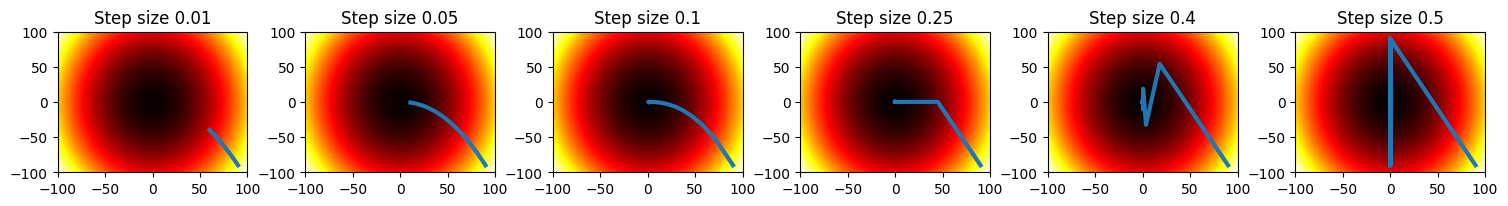

In [10]:
# PLEASE DO NOT REMOVE!
# This piece of code serves for the analysis.
# Running the GD algorithm with different step sizes
num_epochs = 20 # the number of epochs
step_sizes = [0.01, 0.05, 0.1, 0.25, 0.4, 0.5] # the step sizes

# plotting the convergence of the GD
fig_gd, axs = plt.subplots(1,len(step_sizes),figsize=(15, 2))
fig_gd.tight_layout()

for i in range(len(step_sizes)):
  # take the step size
  step_size = step_sizes[i]
  # init the GD
  gd = GradientDescent(grad, step_size=step_size)
  # plot the convergence
  plot_optimization_process(axs[i], optimizer=gd, title='Step size ' + str(gd.step_size))

**Question 2 (0-0.5pt)**: Please analyze the plots above and comment on the behavior of the gradient-descent for different values of the step size.

**Answer**: It is evident that with a min step size of 0.1, the gradient is barely moving and fails to converge to the minimum. Conversely, as the step size increases, the gradient's descent towards the minimum becomes faster. As the step size continues to increase, the gradient's movement also accelerates. However, when the step size reaches a certain threshold, like 0.5, the gradient overshoots the minimum with each step, unable to reach it. Therefore, it's crucial to find a balance between the step size and the gradient descent rate to ensure that the minimum is reached efficiently.


**Question 3 (0-0.5pt)**: What could we do to increase the convergence when the step size equals 0.01? What about when the step size equals 0.5?

**Answer**: for 0.01 A small step size's slow convergence can be combated by adding momentum. Even if the gradient slightly changes direction, momentum allows the gradient to continue moving in the same direction. This promotes convergence more quickly. For 0.05 we could implement backtracking line search. This is a method for determining an appropriate step size that minimizes the objective function is backtracking line search. This method can assist in automatically adjusting the step size to avoid overshooting.

## 3. The derivative-free optimization

In the second part of this assignment, you are asked to implement a derivative-free optimziation (DFO) algorithm. Please notice that you are free to choose any DFO method you wish.
Moreover, you are encouraged to be as imaginative as possible! Do you have an idea for a new method or combine multiple methods? Great! 

**Question 4 (0-0.5-1-1.5-2-2.5-3pt)**: Please provide a description (a pseudocode) of your DFO method here.

*NOTE (grading): Please keep in mind: start simple, make sure your approach works. You are encouraged to use your creativity and develop more complex approaches that will influence the grading. TAs will also check whether the pseudocode is correct.*

**Answer:** 
   

*Input:* PLEASE FILL IN

1. Initialize DFO class:
   1.1. Inputs: objective function, step size, bounds
   1.2. Define obj_fun, step_size, bounds as class variables

2. Define step method:
   2.1. Input: old position x_old
   2.2. Define the number of neighbours as n_neighbours
   2.3. Generate 10 neighbours by adding a random vector scaled by the step size to the old position
   2.4. Evaluate the objective function for each neighbour
   2.5. Choose the neighbour with the minimum objective function value as the new position
   2.6. Return the new position x_new

3. Set number of epochs as num_epochs = 50

4. Define the bounds for the input variables as bounds_x1 and bounds_x2

5. Define bounds as an array of bounds_x1 and bounds_x2

6. Define a list of step sizes to try as step_sizes = [0.01, 1, 2, 3, 4, 5, 6]

7. Create a figure with a subplot for each step size using the subplots method with inputs of 1 row and len(step_sizes) columns, and a figsize of (15, 2). Assign the figure to fig_dfo and the axes to axs.

8. Adjust the spacing between the subplots using the tight_layout method of fig_dfo.

9. Iterate over each step size using the enumerate method on step_sizes:
   9.1. Assign the current step size to step_size
   9.2. Initialize a DFO object with inputs of f, step_size, and bounds. Assign the DFO object to dfo.
   9.3. Plot the optimization process using the plot_optimization_process function with inputs of the current axis, dfo, and a title of "Step size: " + str(step_size).


In [11]:
#=========
# GRADING: 0-0.5-1-1.5-2pt
# 0
# 0.5pt the code works but it is very messy and unclear
# 1.0pt the code works but it is messy and badly commented
# 1.5pt the code works but it is hard to follow in some places
# 2.0pt the code works and it is fully understandable
#=========
# Implement a derivative-free optimization (DFO) algorithm. 
# REMARK: during the init, you are supposed to pass the obj_fun and other objects that are necessary in your method.

import numpy as np

class DFO(object):
    # The class constructor takes the objective function, step size, and bounds as inputs
    def __init__(self, obj_fun, step_size, l_u_bounds):
        self.obj_fun = obj_fun
        self.step_size = step_size
        self.l_u_bounds = l_u_bounds
    
    # This method takes the old position as input and returns the new position
    def step(self, x_old):
        # Define the number of neighbours
        n_n = 15
        
        # Generate 10 neighbours by adding a random vector scaled by the step size to the old position
        neighbours = [x_old + np.random.randn(len(self.l_u_bounds)) * self.step_size for i in range(n_n)]
        
        # Evaluate the objective function for each neighbour
        obj_fun = [self.obj_fun(i) for i in neighbours]
        
        # Choose the neighbour with the minimum objective function value as the new position
        x_new = neighbours[np.argmin(np.array(obj_fun))]
        
        # Return the new position
        return x_new











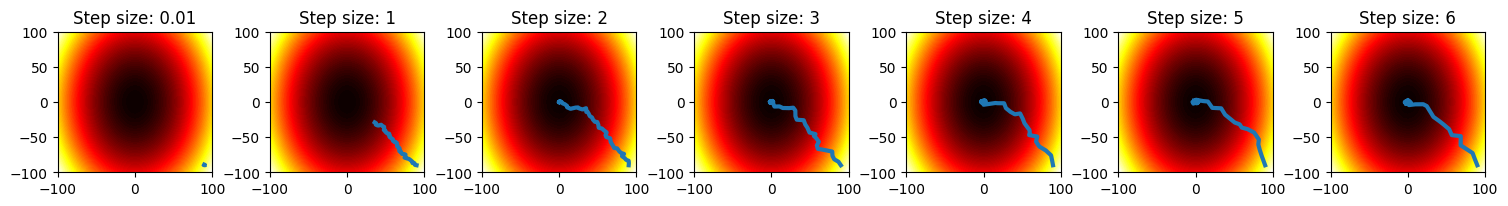

In [12]:
# PLEASE DO NOT REMOVE!
# Running the DFO algorithm with different step sizes
#num_epochs = 20 # the number of epochs (you may change it!)

## PLEASE FILL IN
## Here all hyperparameters go.
## Please analyze at least one hyperparameter in a similar manner to the 
## step size in the GD algorithm.
# ...

## plotting the convergence of the DFO
## Please uncomment the two lines below, but please provide the number of axes (replace HERE appriopriately)
#fig_dfo, axs = plt.subplots(1, HERE, figsize=(15, 2))
#fig_dfo.tight_layout()

# the for-loop should go over (at least one) parameter(s) (replace HERE appriopriately)
# and uncomment the line below
#for i in range(HERE):

  ## PLEASE FILL IN
  # ...
  #dfo = DFO(f, ...)
  # plot the convergence
  # please change the title accordingly!
  #plot_optimization_process(axs[i], optimizer=dfo, title='')
# PLEASE DO NOT REMOVE!
# Running the DFO algorithm with different step size

# Define the bounds of the search space and the different step sizes to use for the optimization process.

#set n epochs
num_epochs = 50
#Define the bounds for the input variables
bound1, bounds2 = np.asarray([x1[0], x1[-1]]), np.asarray([x2[0], x2[-1]])
l_u_bounds = np.asarray([bound1, bounds2])
#Define a list of step sizes to try
step_sizes = [0.01, 1, 2, 3, 4, 5, 6]
#Create a figure with a subplot for each step size
fig_dfo, axs = plt.subplots(1, len(step_sizes), figsize=(15, 2))
#Adjust the spacing between the subplots
fig_dfo.tight_layout()
#Iterate over each step size
for i, step_size in enumerate(step_sizes):
    dfo = DFO(f, step_size, l_u_bounds)
    plot_optimization_process(axs[i], optimizer=dfo, title="Step size: " + str(step_size))
  


**Question 5 (0-0.5-1pt)** Please comment on the behavior of your DFO algorithm. What are the strong points? What are the (potential) weak points? During working on the algorithm, what kind of problems did you encounter?

**Answer:** 

This algorithm does nor require the computation of gradients which can be time-consuming or even impossible for some objective functions it also does not require tuning of hyperparameters such as learning rates or momentum
However, this algorithm also has some potential weak points: It can be slow to converge, especially for high-dimensional problems and it can get stuck in local minima.
Convergence can be slow, especially for high-dimensional or complex objective functions. I also noticed that putting this code in the landscape shown above was hard and another type of graph is shown. 

## 4. Final remarks: GD vs. DFO

Eventually, please answer the following last question that will allow you to conclude the assignment draw conclusions.

**Question 6 (0-0.5pt)**: What are differences between the two approaches?

**Answer**: For minimizing a given function, two different optimization techniques called GD and DFO are used. Gradient Descent (GD), a first-order optimization method, reduces a function by repeatedly changing the parameters in the opposite direction of the function's negative gradient. In contrast, a group of optimization techniques known as Derivative-Free Optimization (DFO) do not call for the computation of the function's derivatives. To investigate the function's space and establish the minimum, DFO methods combine search and sampling methods. When the function is non-differentiable or has numerous local minima that could capture gradient-based optimization methods, DFO approaches are especially advantageous. In summary, the main difference between GD and DFO is that GD uses the gradient of the function to guide the optimization process, while DFO does not rely on derivatives and uses other techniques to search for the minimum

**Question 7 (0-0.5)**: Which of the is easier to apply? Why? In what situations? Which of them is easier to implement in general?

**Answer**: 
Depending on the particular problem at hand and the properties of the function being optimized, GD or DFO may be simpler to use or implement. In general, GD is simpler to use and put into practice when the function has a smooth surface, is differentiable, and the gradient of the function can be computed quickly. A variety of libraries and packages are available in numerous programming languages to implement the straightforward optimization algorithm known as GD. DFO, on the other hand, can be more difficult to use and implement because it calls for a variety of methods to explore the function space, including stochastic methods, genetic algorithms, and pattern search. When a function is non-differentiable, has multiple local optima, or when computing derivatives is costly or impractical, DFO can be especially helpful. In short, if the function is smooth and differentiable, GD is easier to implement, but if it's non-differentiable or has multiple local optima, DFO may be better. The choice between GD and DFO depends on the problem and trade-offs between cost, speed, and accuracy.


